<a href="https://colab.research.google.com/github/dioskit/ML-test/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [ ]:
test_path = "/content/drive/MyDrive/Colab Notebooks/titanic/test.csv"
train_path = "/content/drive/MyDrive/Colab Notebooks/titanic/train.csv"

In [ ]:
dftrain = pd.read_csv(train_path)
dftest = pd.read_csv(test_path)


In [ ]:
# y_train = dftrain.pop('Survived')
# y_test = dftest.pop('Survived')

In [ ]:
dftrain.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Data-Dictionary
Variable	Definition	Key
- **survival**	_Survival	0 = No, 1 = Yes_
- **pclass**	_Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd_
- **sex**	_Sex_
- **Age**	_Age in years_
- **sibsp**	_# of siblings / spouses aboard the Titanic_
- **parch**	_# of parents / children aboard the Titanic_
- **ticket**	_Ticket number_
- **fare**	_Passenger fare_
- **cabin**	_Cabin number_
- **embarked**: _Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton_


In [ ]:
dftrain.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
dftrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
dftrain.shape[0], dftest.shape[0]

(891, 418)

In [ ]:
import seaborn as sns


<Axes: xlabel='Age', ylabel='Count'>

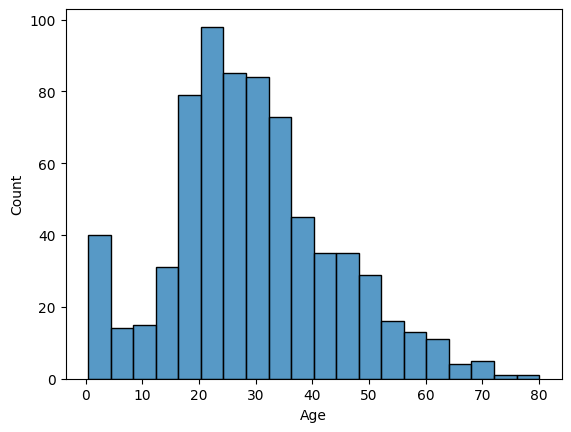

In [ ]:
sns.histplot(dftrain['Age'],bins=20)


<Axes: xlabel='Sex', ylabel='count'>

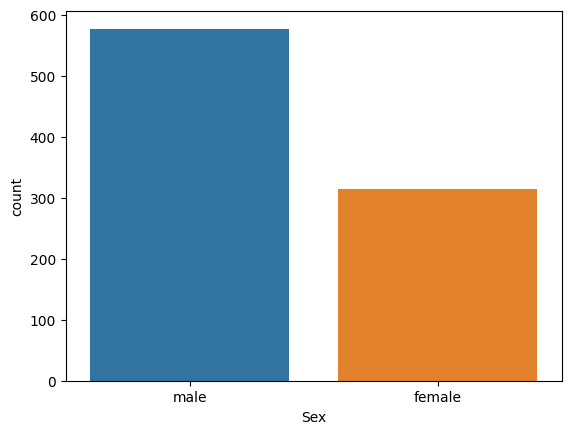

In [ ]:
sns.countplot(x='Sex',hue='Sex',data=dftrain)

<Axes: xlabel='Pclass', ylabel='count'>

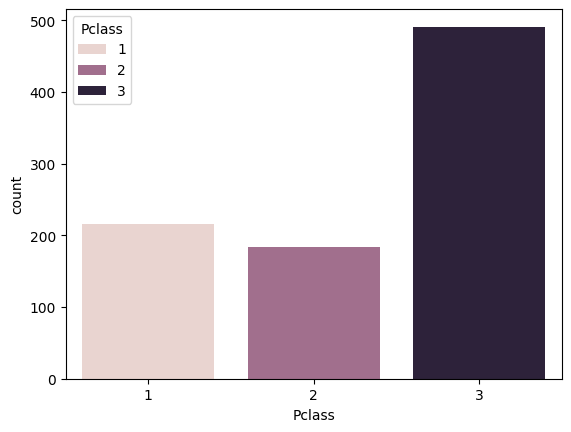

In [ ]:
sns.countplot(x='Pclass',hue='Pclass',data=dftrain)

<Axes: ylabel='Sex'>

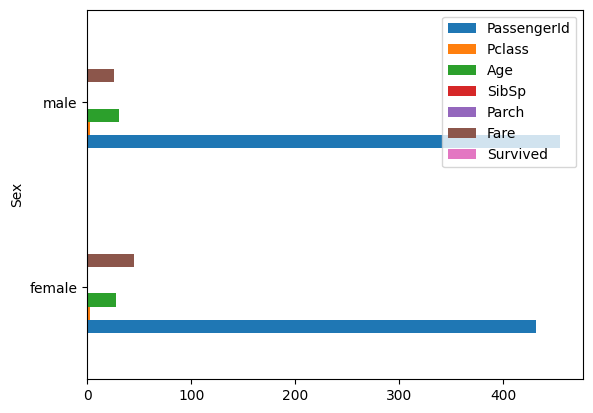

In [ ]:
# Select only numerical columns before calculating the mean
pd.concat([dftrain, y_train], axis=1).groupby('Sex').mean(numeric_only=True).plot(kind='barh')

In [ ]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


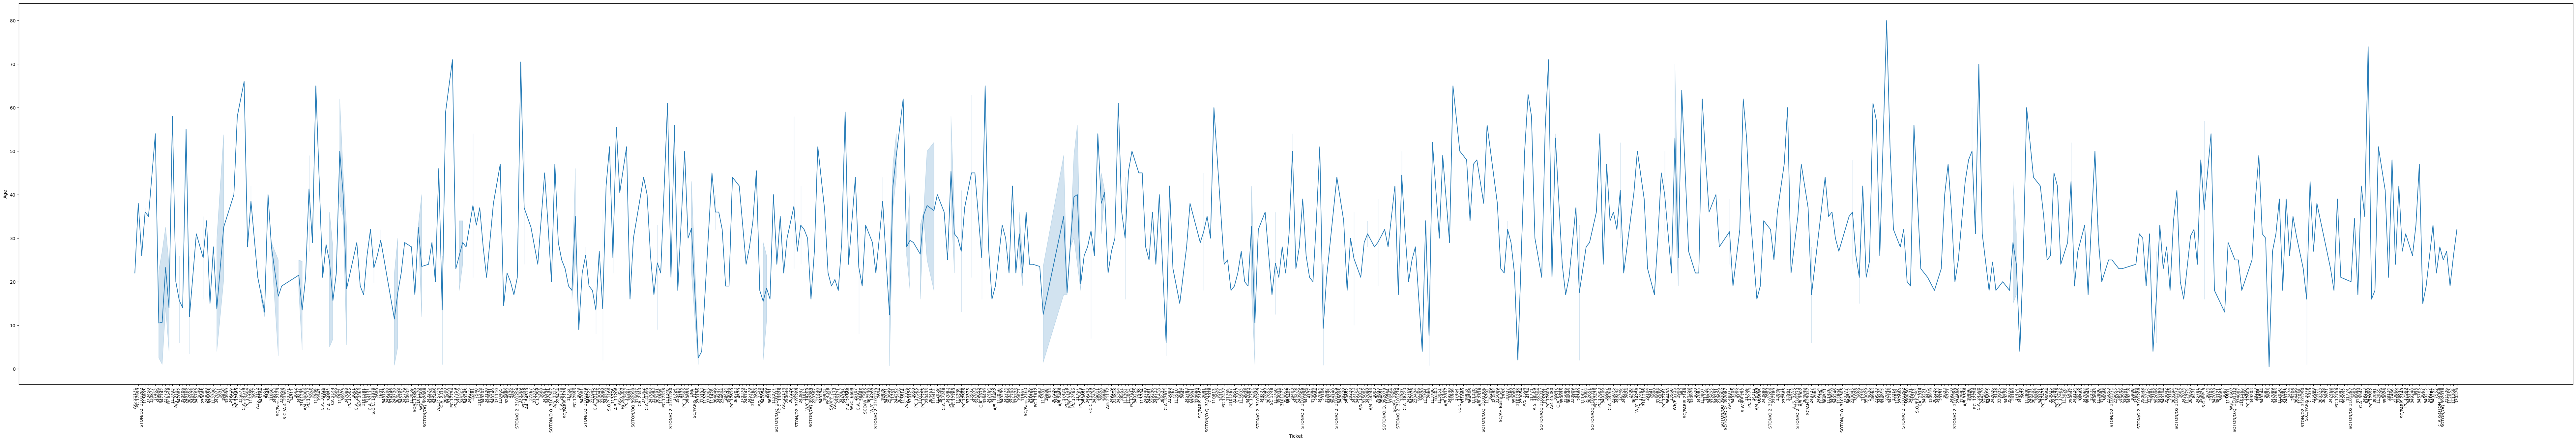

In [ ]:
plt.figure(figsize=(100,15))
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=9)
sns.lineplot(data=dftrain,y='Age',x='Ticket')

In [ ]:
mean_age = dftrain.Age.mean()
dftrain.Age.fillna(mean_age,inplace=True)
# dftrain.drop(['PassengerId'],axis=1,inplace=True)

In [ ]:
dftrain.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
dftrain.Embarked.unique()
for i in dftrain.Embarked:
  if i == 'S':
    dftrain.Embarked.replace(i,1,inplace=True)
  elif i == 'C':
    dftrain.Embarked.replace(i,2,inplace=True)
  else:
    dftrain.Embarked.replace(i,3,inplace=True)

In [ ]:
#correlation matrix
for i in dftrain.Sex:
  if i == 'male' or i == np.nan:
    dftrain.Sex.replace(i,1,inplace=True)
  else:
    dftrain.Sex.replace(i,0,inplace=True)
# dftrain.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)


<Figure size 1000x1000 with 0 Axes>

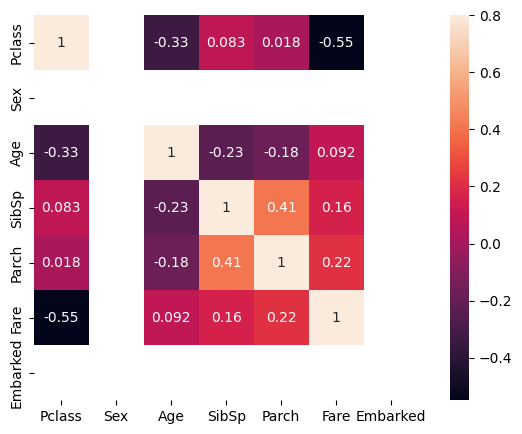

In [ ]:
plt.figure(figsize=(10,10))
corrmat = dftrain.corr()
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

In [ ]:
# ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch','Ticket', 'Fare', 'Cabin', 'Embarked']


numeric_columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_columns = ['Sex', 'Embarked']
# feature_columns = []
# for feature_name in numeric_columns:
#   feature_columns.appen(tf.feauture_column.numeric_column(feature_name,dtype=tf.float32))
# for feature_name in categorical_columns:
#   vocabulary = dftrain[feature_name].unique()
#   feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name,vocabulary))


AttributeError: 'list' object has no attribute 'appen'